In [71]:

# Import necessary libraries and load the dataset. 

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

# Load data
df = pd.read_csv('kc_house_data.csv', encoding='ISO-8859-1')
df.head()

In [76]:
# Display the first few rows of the dataset to inspect its structure, 


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [105]:

# Display the first few rows of the dataset to inspect its structure

df.isna().sum()  # Check for missing values

id               20613
date                 0
price            20613
bedrooms         20613
bathrooms        20613
sqft_living      20613
sqft_lot         20613
floors           20613
waterfront       20613
view             20613
condition        20613
grade            20613
sqft_above       20613
sqft_basement    20613
yr_built         20613
yr_renovated     20613
zipcode          20613
lat              20613
long             20613
sqft_living15    20613
sqft_lot15       20613
dtype: int64

In [107]:
# Feature engineering (if needed)
# For example, convert date to year, month, day
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop(['id', 'date'], axis=1)

# Drop rows where the target variable 'price' is NaN
df = df.dropna(subset=['price'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,...,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,1970,1,1
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,...,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,1970,1,1
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,...,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,1970,1,1
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,...,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,1970,1,1
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,...,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,1970,1,1


In [82]:

df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,5.206465e+05,3.349349,2.045796,2051.397397,14707.242242,1.446947,0.008008,0.237237,3.464464,7.605606,...,1969.030030,81.830831,98074.441441,47.549720,-122.207406,1986.813814,13500.824825,2014.304304,6.632633,15.194194
std,3.395794e+05,0.852367,0.721983,888.351113,28975.077254,0.517420,0.089173,0.765472,0.689521,1.160734,...,28.198607,395.767918,52.545832,0.141558,0.139564,670.723475,25106.087226,0.460343,3.169585,8.399013
min,8.000000e+04,0.000000,0.000000,380.000000,649.000000,1.000000,0.000000,0.000000,1.000000,4.000000,...,1900.000000,0.000000,98001.000000,47.177500,-122.490000,830.000000,660.000000,2014.000000,1.000000,1.000000
25%,3.098000e+05,3.000000,1.500000,1405.000000,5419.000000,1.000000,0.000000,0.000000,3.000000,7.000000,...,1952.000000,0.000000,98032.000000,47.443000,-122.322500,1490.000000,5403.000000,2014.000000,4.000000,8.000000
50%,4.350000e+05,3.000000,2.000000,1900.000000,8040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,...,1974.000000,0.000000,98058.000000,47.563600,-122.218000,1850.000000,7995.000000,2014.000000,7.000000,15.000000
75%,6.344625e+05,4.000000,2.500000,2475.000000,11508.500000,2.000000,0.000000,0.000000,4.000000,8.000000,...,1992.000000,0.000000,98116.000000,47.673400,-122.118000,2360.000000,10414.000000,2015.000000,9.000000,22.000000
max,3.075000e+06,7.000000,5.000000,6070.000000,315374.000000,3.500000,1.000000,4.000000,5.000000,12.000000,...,2015.000000,2014.000000,98199.000000,47.777600,-121.709000,4760.000000,233971.000000,2015.000000,12.000000,31.000000


In [83]:
# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Impute missing values in features
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,...,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,2014.0,10.0,13.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,...,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014.0,12.0,9.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,...,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,2015.0,2.0,25.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,...,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,2014.0,12.0,9.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,...,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,2015.0,2.0,18.0


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

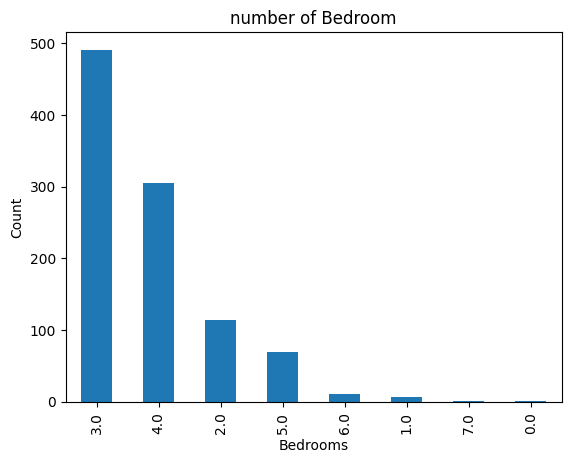

In [84]:
# Analysing based on most common house
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

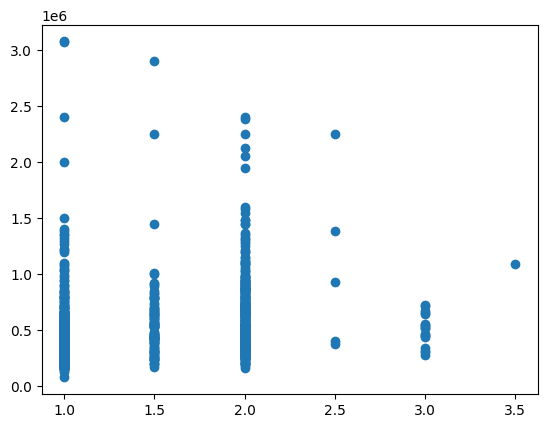

In [85]:
plt.scatter(df.floors,df.price)

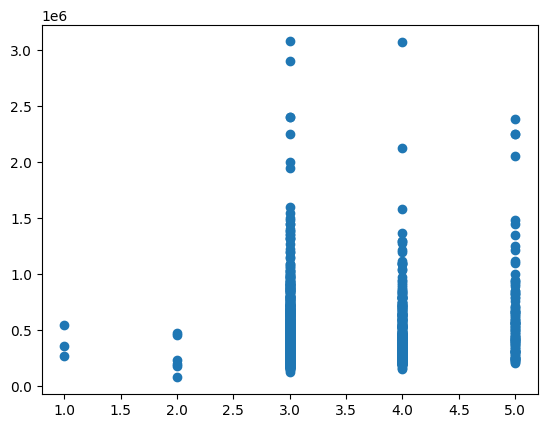

In [86]:

plt.scatter(df.condition,df.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

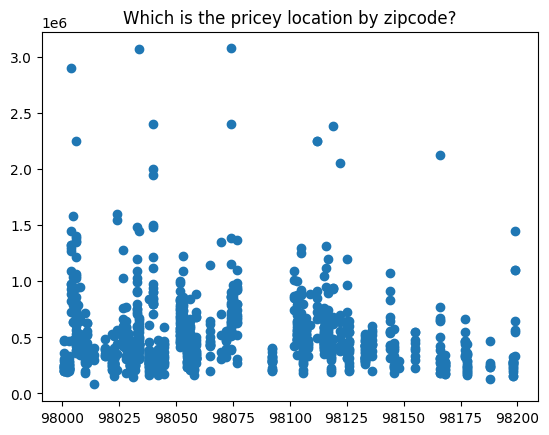

In [87]:
plt.scatter(df.zipcode,df.price)
plt.title("Which is the pricey location by zipcode?")

In [88]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Figure size 1000x1000 with 0 Axes>

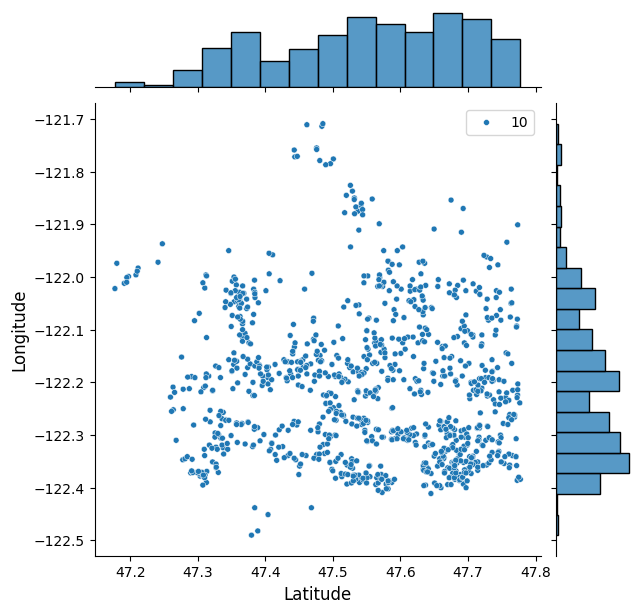

<Figure size 640x480 with 0 Axes>

In [89]:
#Visualizing the location of the houses based on latitude and longitude.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine()


Text(0.5, 1.0, 'Price vs Square Feet')

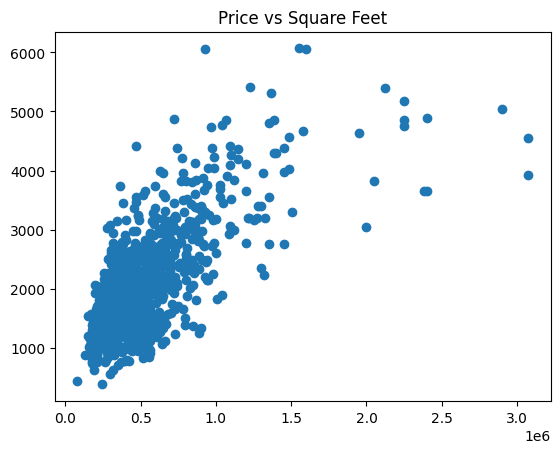

In [90]:
# Analysing common factors are affecting the price of the houses 

plt.scatter(df.price,df.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Latitude vs Price')

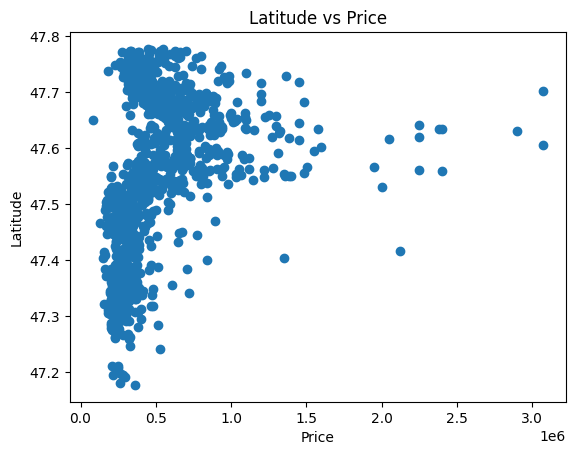

In [91]:
plt.scatter(df.price,df.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

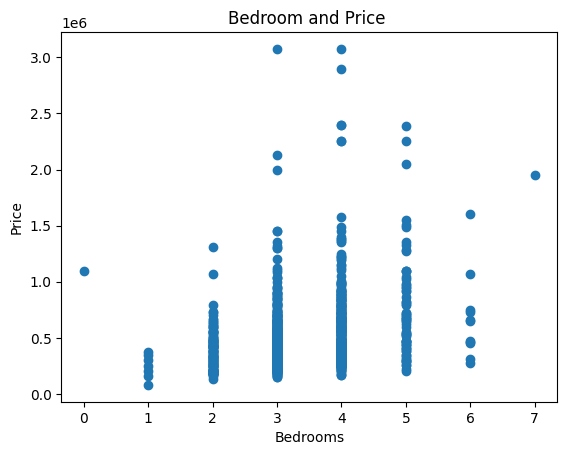

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [92]:
plt.scatter(df.bedrooms,df.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

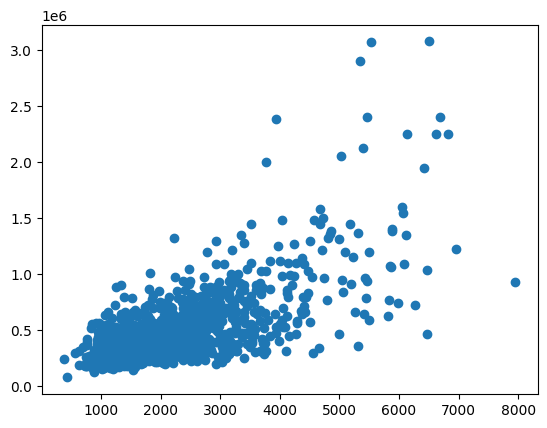

In [93]:
plt.scatter((df['sqft_living']+df['sqft_basement']),df['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

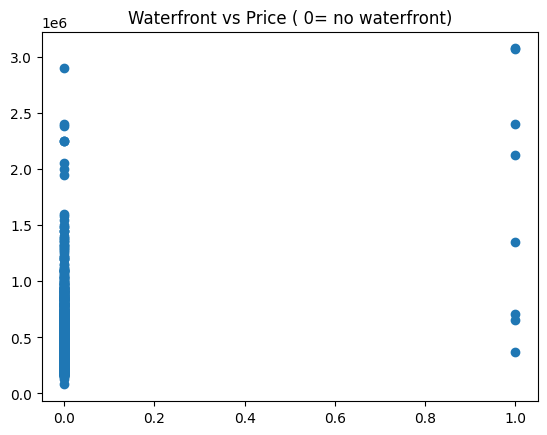

In [95]:
plt.scatter(df.waterfront,df.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

In [97]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv('kc_house_data.csv')
reg = LinearRegression()

labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date ]
df['date'] = conv_dates
train1 = df.drop(['id', 'price'],axis=1)

reg.fit(X_train,y_train)
reg.score(X_test,y_test)


0.6619146614057673

In [99]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [101]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error

# Define the kernel
fixed_kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create GaussianProcessRegressor with fixed kernel
gpr_fixed = GaussianProcessRegressor(kernel=fixed_kernel, n_restarts_optimizer=10, alpha=1e-2)

# Fit to the training data
gpr_fixed.fit(X_train, y_train)

# Predict on the test data
y_pred_fixed, y_std_fixed = gpr_fixed.predict(X_test, return_std=True)

# Evaluate the model
mse_fixed = mean_squared_error(y_test, y_pred_fixed)
print(f'Mean Squared Error (Fixed Hyperparameters): {mse_fixed}')


Mean Squared Error (Fixed Hyperparameters): 54696472864.77287


In [102]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "kernel": [C(1.0, (1e-3, 1e3)) * RBF(length_scale) for length_scale in [1.0, 1.5, 2.0]]
}

# Perform grid search
gpr_grid = GridSearchCV(GaussianProcessRegressor(n_restarts_optimizer=10, alpha=1e-2), param_grid, cv=5, scoring='neg_mean_squared_error')
gpr_grid.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {gpr_grid.best_params_}')

# Best estimator
best_gpr = gpr_grid.best_estimator_

# Predict with the best estimator
y_pred_best, y_std_best = best_gpr.predict(X_test, return_std=True)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Best Model Mean Squared Error (Optimized Hyperparameters): {mse_best}')


Best parameters: {'kernel': 1**2 * RBF(length_scale=2)}
Best Model Mean Squared Error (Optimized Hyperparameters): 54696472441.59373


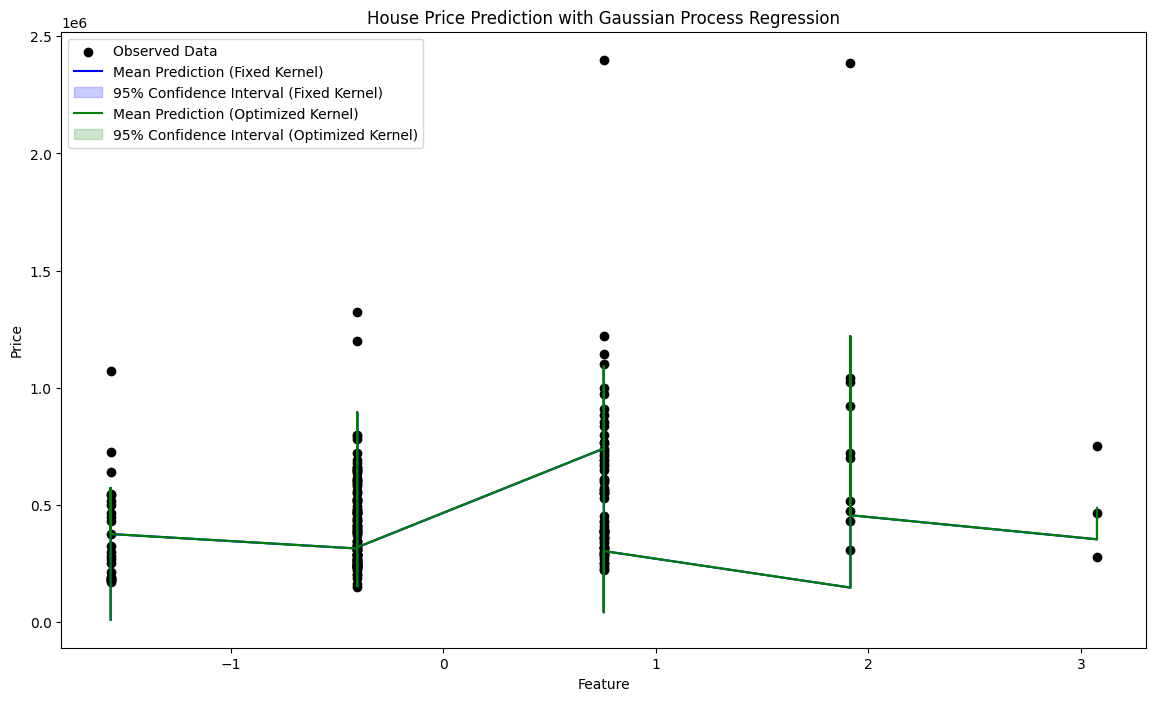

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Sort test data for better plotting
sorted_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test.values[sorted_indices]
y_pred_fixed_sorted = y_pred_fixed[sorted_indices]
y_std_fixed_sorted = y_std_fixed[sorted_indices]
y_pred_best_sorted = y_pred_best[sorted_indices]
y_std_best_sorted = y_std_best[sorted_indices]

# Plot the predictions
plt.figure(figsize=(14, 8))

# Plot observed data points
plt.scatter(X_test_sorted[:, 0], y_test_sorted, color='black', label='Observed Data')

# Plot predictions and confidence intervals for fixed hyperparameters
plt.plot(X_test_sorted[:, 0], y_pred_fixed_sorted, 'b-', label='Mean Prediction (Fixed Kernel)')
plt.fill_between(X_test_sorted[:, 0], 
                 y_pred_fixed_sorted - 1.96 * y_std_fixed_sorted, 
                 y_pred_fixed_sorted + 1.96 * y_std_fixed_sorted, 
                 alpha=0.2, color='blue', label='95% Confidence Interval (Fixed Kernel)')

# Plot predictions and confidence intervals for optimized hyperparameters
plt.plot(X_test_sorted[:, 0], y_pred_best_sorted, 'g-', label='Mean Prediction (Optimized Kernel)')
plt.fill_between(X_test_sorted[:, 0], 
                 y_pred_best_sorted - 1.96 * y_std_best_sorted, 
                 y_pred_best_sorted + 1.96 * y_std_best_sorted, 
                 alpha=0.2, color='green', label='95% Confidence Interval (Optimized Kernel)')

plt.legend()
plt.xlabel('Feature')
plt.ylabel('Price')
plt.title('House Price Prediction with Gaussian Process Regression')
plt.show()


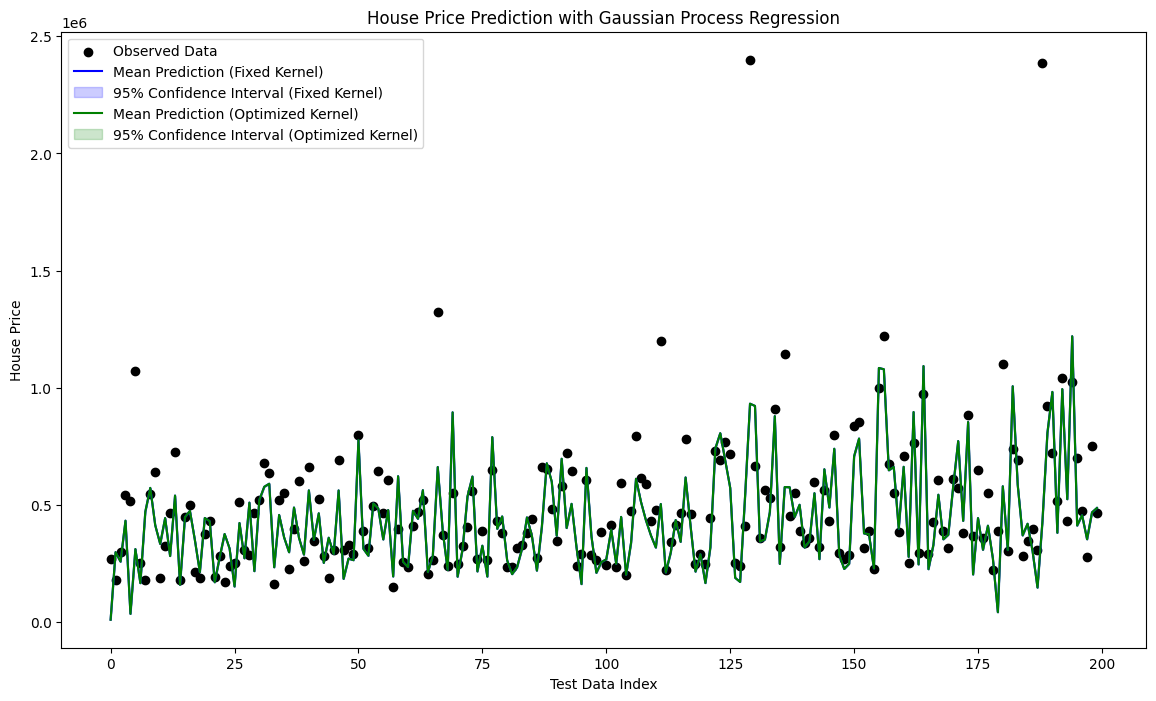

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Sort test data for better plotting
sorted_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test.values[sorted_indices]
y_pred_fixed_sorted = y_pred_fixed[sorted_indices]
y_std_fixed_sorted = y_std_fixed[sorted_indices]
y_pred_best_sorted = y_pred_best[sorted_indices]
y_std_best_sorted = y_std_best[sorted_indices]

# Plot the predictions
plt.figure(figsize=(14, 8))

# Plot observed data points
plt.scatter(np.arange(len(y_test_sorted)), y_test_sorted, color='black', label='Observed Data')

# Plot predictions and confidence intervals for fixed hyperparameters
plt.plot(np.arange(len(y_test_sorted)), y_pred_fixed_sorted, 'b-', label='Mean Prediction (Fixed Kernel)')
plt.fill_between(np.arange(len(y_test_sorted)), 
                 y_pred_fixed_sorted - 1.96 * y_std_fixed_sorted, 
                 y_pred_fixed_sorted + 1.96 * y_std_fixed_sorted, 
                 alpha=0.2, color='blue', label='95% Confidence Interval (Fixed Kernel)')

# Plot predictions and confidence intervals for optimized hyperparameters
plt.plot(np.arange(len(y_test_sorted)), y_pred_best_sorted, 'g-', label='Mean Prediction (Optimized Kernel)')
plt.fill_between(np.arange(len(y_test_sorted)), 
                 y_pred_best_sorted - 1.96 * y_std_best_sorted, 
                 y_pred_best_sorted + 1.96 * y_std_best_sorted, 
                 alpha=0.2, color='green', label='95% Confidence Interval (Optimized Kernel)')

plt.legend()
plt.xlabel('Test Data Index')
plt.ylabel('House Price')
plt.title('House Price Prediction with Gaussian Process Regression')
plt.show()


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ExpSineSquared, ConstantKernel, DotProduct, Matern
from sklearn.model_selection import train_test_split

# Select relevant features
dfn = df[['bathrooms', 'sqft_living', 'price']]

# Ensure enough samples for splitting
if len(dfn) < 5:  # Adjust this condition based on your dataset size
    raise ValueError("Dataset is too small for splitting with test_size=0.2.")

# Slice the data
dfn2 = dfn.iloc[20000:]
dfn3 = dfn2[['bathrooms', 'sqft_living']]

# Features and target
X = dfn3
y = dfn2['price']

# Split the data into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define kernels
    kernels = [
        1.0 * RBF(length_scale=0.5, length_scale_bounds=(1e-05, 100000.0)),
        1.0 * RationalQuadratic(length_scale=0.5, alpha=0.1),
        1.0 * ExpSineSquared(length_scale=0.5, periodicity=3.0,
                             length_scale_bounds=(1e-05, 100000.0),
                             periodicity_bounds=(1.0, 10.0)),
        ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
        1.0 ** 2 * Matern(length_scale=0.5, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
    ]

    # Number of restarts for the optimizer
    n_restarts = np.arange(0, 10, 3)

    # Loop through each kernel and number of restarts
    for kernel in kernels:
        for i in n_restarts:
            # Specify Gaussian Process parameters
            if isinstance(kernel, ExpSineSquared):
                alpha = 1.0
            elif isinstance(kernel, ConstantKernel) and isinstance(kernel.k2, DotProduct):
                alpha = 1.0
            else:
                alpha = 1.0

            # Gaussian Process Regressor
            gp = GaussianProcessRegressor(kernel=kernel, alpha=alpha, optimizer='fmin_l_bfgs_b',
                                          n_restarts_optimizer=i, normalize_y=False,
                                          copy_X_train=True, random_state=2016)

            # Fit the model
            gp.fit(X_train, y_train)

            # Make predictions
            y_pred, sigma = gp.predict(X_test, return_std=True)

            # Plotting
            fig, ax = plt.subplots(figsize=(6, 4))
            ax.scatter(X_test['sqft_living'], y_pred, color='red', label='GPR prediction')
            ax.scatter(X_test['sqft_living'], y_test, color='blue', label='y_test')

            # Regression plot using seaborn
            sns.regplot(x=X_test['sqft_living'], y=y_pred, scatter=False, label='GPR Reg_plot', ax=ax)

            # Labels and title
            ax.set_xlabel('Sqft_living')
            ax.set_ylabel('Price')
            ax.set_title(f'Kernel: {kernel}')
            ax.set_title(f'Kernel: {kernel}', fontsize=14)
            ax.set_title(f'N_restarts: {i}', fontsize=14)
            ax.legend()
            plt.tight_layout()

            # Show the plot
            plt.show()

except ValueError as ve:
    print(ve)


With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
